Importing Normalize Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np

DataFrameCleaned = pd.read_csv('N:\AI_ML_RL\APT_dataset\dataset_\datacleaning\cleanedPCA.csv',sep=',')
print(DataFrameCleaned.shape)


(77963, 32)


In [11]:
print(DataFrameCleaned.head(1))

   principal component0  principal component1  principal component2  \
0             -0.566649              0.635258              1.680733   

   principal component3  principal component4  principal component5  \
0              1.739556              0.524289               0.19258   

   principal component6  principal component7  principal component8  \
0             -0.940095             -0.188228              0.270067   

   principal component9  ...  principal component22  principal component23  \
0             -3.160114  ...               1.644505               -0.27901   

   principal component24  principal component25  principal component26  \
0               0.193855               0.035811               0.148394   

   principal component27  principal component28  principal component29  \
0               1.178329              -1.255301                0.17378   

   Activity  Stage  
0         5      0  

[1 rows x 32 columns]


Spliting and Appling SVM model from SKLEARN on Normalize Data

In [2]:

# Step 1: Split the dataset into features (X) and labels (y)
X = DataFrameCleaned.drop(columns=['Stage','Activity'])  # Assuming 'Stage' is the target column
y = DataFrameCleaned['Stage']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
## Step 3: Create an SVM model and train it on the training data
svm_model = SVC(kernel='poly', C=0.9) 
svm_model.fit(X_train, y_train)


SVC(C=0.9, kernel='poly')

Predicting and Testing the accuracy of the model

In [9]:

## Step 4: Make predictions using the trained model on the testing data
y_pred = svm_model.predict(X_test)
## Step 5: Evaluate the performance of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model SVM :", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
conf_matrix = confusion_matrix(y_test, y_pred)

with open('SVM_APT_Stage.txt', 'w') as file:
    file.write("APT Attacks with SVM\n")
    file.write("USING 'Stage' AS TARGET\n")
    # Print the metrics
    file.write("Weighted F1 Score:"+ str(f1))
    file.write("Weighted Precision:"+str(precision))
    file.write("Weighted Recall:"+str(recall))
    file.write("Confusion Matrix:\n"+str(conf_matrix))


Accuracy of the model SVM : 0.996216250881806


c:\Users\NasrJB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluate the performance of the SVM model

    Calculate Confusion Matrix

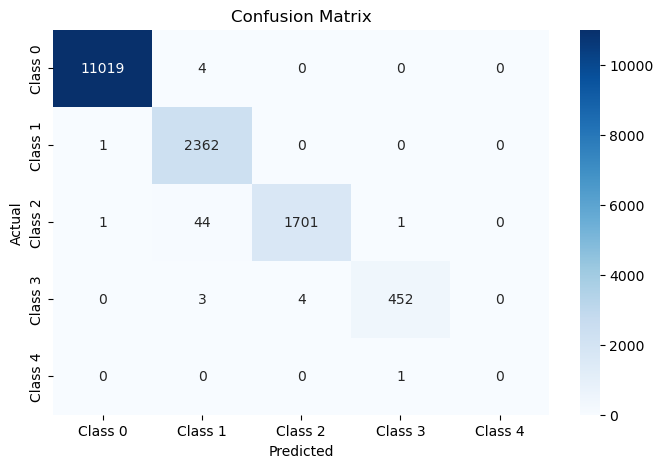

In [10]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
                 

# Visualize confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix,
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=['Class 0', 'Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0', 'Class 1','Class 2','Class 3','Class 4']
            )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


    The Receiver Operating Characteristic (ROC) curve

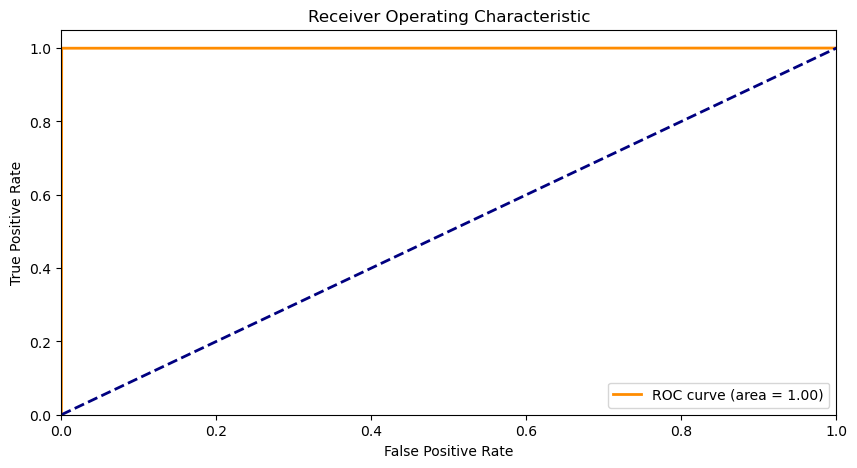

In [15]:

## Making all values in binary forme 
def replace_criteria(value):
    if value == 0:
        return value 
    else:
        return 1

# Apply the criteria function to each element in the list
y_pred_in_Binary = [replace_criteria(value) for value in y_pred]
y_test_in_binary = [replace_criteria(value) for value in y_test]

# Assuming 'y_test_in_binary' is the true labels and 'y_pred_in_Binary' are the predicted scores/probabilities
fpr, tpr, thresholds = roc_curve(y_test_in_binary, y_pred_in_Binary)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

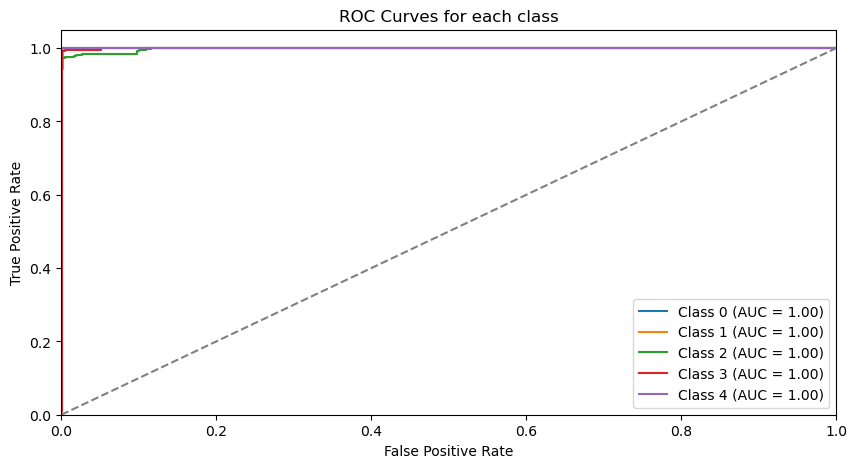

In [16]:

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Plot individual ROC curves for each class
plt.figure(figsize=(10, 5))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_model.decision_function(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for each class')
plt.legend(loc='lower right')
plt.show()





In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())


Cross-Validation Scores: [0.98197909 0.80395049 0.99499776 0.99551052 0.89693433]
Mean Accuracy: 0.9346744365400308
Standard Deviation: 0.07495429035074343


In [19]:
f1_scores = cross_val_score(svm_model, X, y, cv=5, scoring='f1_weighted')
precision_scores = cross_val_score(svm_model, X, y, cv=5, scoring='precision_weighted')
recall_scores = cross_val_score(svm_model, X, y, cv=5, scoring='recall_weighted')

print("F1 Scores:", f1_scores)
print("Precision Scores:", precision_scores)
print("Recall Scores:", recall_scores)


F1 Scores: [0.98152796 0.82582602 0.99498293 0.99549397 0.87729359]
Precision Scores: [0.98294298 0.91225646 0.99511173 0.995507   0.90931359]
Recall Scores: [0.98197909 0.80395049 0.99499776 0.99551052 0.89693433]


Saving the model

In [21]:
import joblib

# Save the SVM model to a file
joblib.dump(svm_model, 'svm_model_APT_Stage.pkl')

['svm_model_APT_Stage.pkl']